In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import kaleido

In [5]:
#Remove warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv(r'C:\Users\PC\OneDrive\Documents\diamonds.csv')
print(df.shape)
df=df.sample(frac=0.1, random_state=10) #random state is a seed value
print(df.shape)

(53940, 11)
(5394, 11)


In [14]:
# Reindex data
df.reset_index(drop=True, inplace=True)


In [ ]:
df.head()

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0        8019   1.01    Premium     E     SI1   61.7   56.0   4330  6.44   
1        1584   0.70  Very Good     D     VS1   60.4   58.0   3008  5.71   
2        9139   1.13  Very Good     H     SI2   59.8   59.0   4537  6.75   
3        2788   0.76      Ideal     F     VS2   61.0   55.0   3257  5.89   
4       52430   0.70    Premium     I    VVS1   61.2   59.0   2513  5.65   
5       47229   0.55      Ideal     D     SI1   60.9   57.0   1840  5.29   

      y     z  
0  6.39  3.96  
1  5.78  3.47  
2  6.82  4.06  
3  5.92  3.60  
4  5.69  3.47  
5  5.32  3.23

In [38]:
#Scatter plot with modified figure size
fig=px.scatter(df, x='carat', y='price',color='cut',
                title='Scatter plot of Carat vs Price',
                labels={'carat':'Carat Weight', 'price':'Price ($)'},
                color_discrete_sequence=px.colors.qualitative.Plotly
                )
fig.update_layout(width=1000, height=500)
fig.show()



In [47]:
df_mean=df.groupby('carat')['price'].mean().reset_index()
df_mean.head()


fig=px.line(df_mean, x='carat', y='price',
                title='Scatter plot of Carat vs Price',
                )

fig.show()


In [50]:
df_mean=df.groupby('carat')['price'].mean().reset_index()
df_mean.head()


fig=px.line(df_mean, x='carat', y='price',
                title='Scatter plot of Carat vs Price',
                )

fig.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_18992\3900406134.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




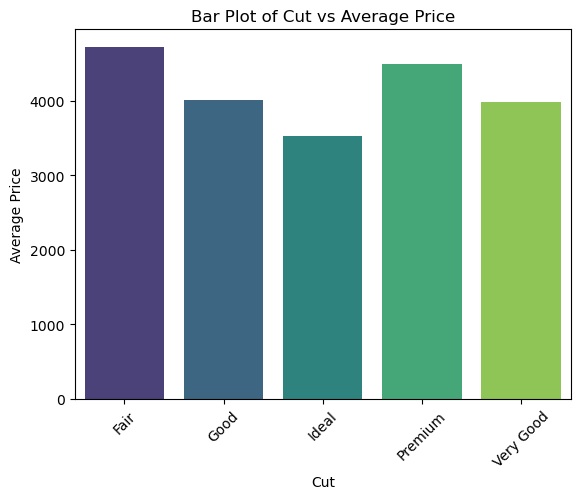

In [75]:
df_stats=df.groupby('cut')['price'].agg(['mean','std','median','var']).reset_index()
df_stats.head()

sns.barplot(data=df_stats, x='cut', y='mean', palette='viridis')  # hue not needed

plt.title('Bar Plot of Cut vs Average Price')
plt.ylabel('Average Price')
plt.xlabel('Cut')
plt.xticks(rotation=45)  # Rotate labels if needed

plt.show()

In [53]:
fig=px.bar(df, x='clarity', y='price',
           title='Bar plot of Cut vs Price',
           color='cut',
           )
fig.show()


In [80]:
df_stats=df.groupby('clarity')['price'].agg(['mean','std']).reset_index()
df_stats.head()

# bar plot for average price by cut
fig=px.bar(df_stats, x='clarity', y='mean', error_y='std',
           title='Bar plot of Cut vs Price',
           color='clarity',
           )
fig.show()


In [99]:
fig=px.histogram(df, x='price',nbins=50,
                 title='Price Distribution',
                 
                 
                 )
fig.show()

In [101]:
fig=px.histogram(df, x='price',nbins=50,color='cut',
                 title='Price Distribution',                           
                 )

fig.show()

In [102]:
#density contour plot
fig=px.density_contour(df, x='carat', y='price',
                        title='Density Contour Plot of Carat vs Price',
                        color='cut',
                        )
fig.show()

In [ ]:
#Box plot
fig=px.box(df, x='cut', y='price', color='clarity',
           points='suspectedoutliers',           #Points means outliers
           title='Box Plot of Cut vs Price',
           labels={'cut':'Cut', 'price':'Price ($)'},
           
           )    
fig.show()


In [118]:
#Violin plot
fig=px.violin(df, x='cut', y='price', 
              color='cut',
           points='suspectedoutliers',           #Points means outliers
           title='Box Plot of Cut vs Price',
           labels={'cut':'Cut', 'price':'Price ($)'},
           
           )    
fig.show()


In [ ]:
 #Facet scatter plot by clarity  
fig=px.scatter(df, x='carat', y='price', color='cut',
                facet_col='clarity',
                title='Facet Scatter Plot of Carat vs Price by Clarity',
                labels={'carat':'Carat Weight', 'price':'Price ($)'},
                )
fig.show()

In [124]:
 #Facet scatter plot by clarity  
fig=px.scatter(df, x='carat', y='price', color='cut',
                facet_col='clarity',
                size='price',
                #animate by cut
                animation_frame='cut',
                title='Facet Scatter Plot of Carat vs Price by Clarity',
                labels={'carat':'Carat Weight', 'price':'Price ($)'},
                )
fig.show()

In [131]:
#Density Heatmap
fig=px.density_heatmap(df, x='carat', y='price',
                        title='Density Heatmap of Carat vs Price',
                         color_continuous_scale='Viridis',

                        )
fig.show()

In [143]:
#Subplots
fig=make_subplots(rows=2, cols=2,
                  subplot_titles=('Carat vs Price', 'Density Heatmapof carat vs price')
)
#Scatter plot of carat vs price

scatter=px.scatter(df, x='carat', y='price').data[0]
fig.add_trace(scatter, row=1, col=1)


#Density Heatmap of carat vs price

heatmap=px.density_heatmap(df, x='carat', y='price').data[0]
fig.add_trace(heatmap, row=1, col=2)

#Update layout
fig.update_layout(title_text='Subplots of Carat vs Price and Density Heatmap',
)

fig.show()


In [172]:
df

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0           8019   1.01    Premium     E     SI1   61.7   56.0   4330  6.44   
1           1584   0.70  Very Good     D     VS1   60.4   58.0   3008  5.71   
2           9139   1.13  Very Good     H     SI2   59.8   59.0   4537  6.75   
3           2788   0.76      Ideal     F     VS2   61.0   55.0   3257  5.89   
4          52430   0.70    Premium     I    VVS1   61.2   59.0   2513  5.65   
...          ...    ...        ...   ...     ...    ...    ...    ...   ...   
5389       26954   2.07  Very Good     H     SI1   59.8   58.0  17019  8.23   
5390       38256   0.26  Very Good     F     VS2   62.5   55.0    381  4.05   
5391       39197   0.43    Premium     D     SI1   60.1   58.0   1064  4.93   
5392        2656   1.05      Ideal     H     SI2   60.6   57.0   3234  6.59   
5393       26388   2.01       Good     H     SI2   64.0   51.0  15888  8.08   

         y     z  
0     6.39  3.96  
1     5.78  3.47  
2     6.82  4.06  
3     5.92  3.60  
4     5.69  3.47  
...    ...   ...  
5389  8.26  4.93  
5390  4.08  2.54  
5391  4.89  2.95  
5392  6.55  3.98  
5393  8.01  5.15  

[5394 rows x 11 columns]

In [176]:
# create correlation of matrix of only numeric columns
corr=df[['carat', 'depth', 'table', 'price','x','y','z']].corr()
fig=go.Figure(data=go.Heatmap(x=corr.index.values,
                               y=corr.columns.values,
                               z=corr.values,
                               
                             colorscale='Viridis',
                              )
)
fig=px.density_heatmap(corr,title='Correlation Martrix',text_auto=True,)
fig.show()

# ***3D PlOTS***

In [13]:
#3D scatter plot
fig=px.scatter_3d(df, x='carat', y='depth', z='cut',
                  color='price',
                  title='3D Scatter Plot of Carat vs Depth vs Price',
                  labels={'carat':'Carat Weight', 'depth':'Depth (%)', 'price':'Price ($)'},
                  )
fig.show()

In [14]:
#3D Line Plot
lineplot=px.line_3d(df,x='carat', y='depth', z='price',
                    color='cut',
                    title='3D Line Plot of Carat vs Depth vs Price',
                    labels={'carat':'Carat Weight', 'depth':'Depth (%)', 'price':'Price ($)'},
                    )
lineplot.show()

# ***Other Plots***

In [19]:
#Bubble chart 
fig=px.scatter(df, x='carat', y='price', size='price',
                color='cut',
                title='Bubble Chart of Carat vs Depth vs Price',
                labels={'carat':'Carat Weight', 'depth':'Depth (%)', 'price':'Price ($)'},
                )
fig.show()

In [24]:
# Area Chart
df_sorted=df.sort_values(by='carat')
fig=px.area(df_sorted, x='carat', y='price',
             title='Area Chart of Carat vs Price',color='cut',
             labels={'carat':'Carat Weight', 'price':'Price ($)'},
             )
fig.show()

In [60]:
#Pie chart
fig=px.pie(df, names='clarity',
           #palette
              color_discrete_sequence=px.colors.sequential.RdBu,
           

              )
           
fig.show()

In [72]:
#tree map
fig=px.treemap(df, path=['cut','clarity','color'], 
               values='price',
                title='Tree Map of Cut vs Clarity vs Price',
                color='price',
                color_continuous_scale='Viridis',
                )
fig.show()

In [74]:
#parallel coordinates plot
fig=px.parallel_coordinates(df, color='price',
                                # dimensions=['carat', 'depth', 'table', 'price'],
                             title='Parallel Coordinates Plot',
                             )
fig.show()

In [76]:
#scatter matrix plot
fig=px.scatter_matrix(df, dimensions=['carat', 'depth', 'table', 'price'],
                        title='Scatter Matrix Plot',
                        color='cut',
                        )
fig.show()

In [85]:
#gantt chart
df_gantt=pd.DataFrame({
    'Task': ['Task 1', 'Task 2', 'Task 3'],
    'Start': ['2023-01-01', '2023-02-01', '2023-03-01'],
    'Finish': ['2023-01-15', '2023-02-15', '2023-03-15'],
    'Resource': ['A', 'B', 'C']

})

df_gantt.head()
fig=px.timeline(df_gantt, x_start='Start', x_end='Finish', y='Task', color='Resource',
                 title='Gantt Chart of Tasks',
                 )
fig.show()

In [110]:
#strip plot
fig=px.strip(df, x='cut', y='price', 
             color='clarity',
             title='Strip Plot of Cut vs Price',
             hover_data=['carat']
             )
fig.update_traces(jitter=0.9, marker=dict(size=5, opacity=1))
fig.update_layout(title_text='Strip Plot of Cut vs Price',
                  xaxis_title='Cut',
                  yaxis_title='Price ($)',
                  )
                
fig.show()

In [113]:

# Aggregate first
df_grouped = df.groupby('cut', as_index=False)['carat'].mean()

# Create the polar plot
fig = px.line_polar(
    df_grouped,
    r='carat',
    theta='cut',
    color='cut',  # Optional for color distinction
    title='Average Carat per Cut (Polar Plot)'
)

fig.update_traces(fill='toself')  # Optional radar style
fig.show()

In [5]:
# sunburst plot
fig=px.sunburst(df, path=['cut',
                          'clarity',
                          'color'
                          ], 
                values='price',
                title='Sunburst Plot of Cut vs Clarity vs Price',
                color='price',
                # color_continuous_scale='Viridis',

                )
fig.show()

In [7]:
# sunburst plot
fig=px.sunburst(df, path=['cut',
                          'clarity',
                          'color'
                          ], 
                values='price',
                title='Sunburst Plot of Cut vs Clarity vs Price',
                color='price',
                # color_continuous_scale='Viridis',

                )
# saving as htlm
fig.write_html('diamonds.html')
# saving as png
import plotly.io as pio
fig.write_image('diamonds.png')



  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl.metadata (15 kB)
Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl (65.9 MB)
